In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
from scipy.signal import butter, filtfilt
from IPython.display import display


In [28]:
def process(inp_name, out_name):

    with open(inp_name, "r") as file:
        with open(out_name, "w") as out:
            out.write("k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time\n")
            ctr = 0
            row = ""
            for line in file:
                line = line.rstrip().split(" ")
                if ctr == 0:
                    row = f"{line[0]},{line[1]},{line[2]},{line[3]},{line[4]},"
                elif ctr == 1:
                    row += f"{line[6]},"
                elif ctr == 9:
                    row += f"{line[6]},"
                elif ctr == 10:
                    row += f"{line[2]},"
                elif ctr == 11:
                    row += f"{line[4]},"
                elif ctr == 12:
                    row += f"{line[4]},"
                elif ctr == 13:
                    row += f"{line[2]}\n"
                    out.write(row)
                    ctr = -1
                ctr += 1

In [29]:
process("results1.txt", "results1.csv")
process("results2.txt", "results2.csv")

In [44]:
data1 = pd.read_csv("results1.csv")
data1['ignore'] = True
data1.head()

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
0,8,0,1.0,0.5,1,17014552,1.90954,1625594,10.4667,0.5,12,True
1,8,0,1.0,0.5,4,20167982,1.89134,1721290,11.7168,0.5,12,True
2,8,0,1.0,0.5,8,20954244,1.87976,1462529,14.3274,0.5,15,True
3,8,0,1.0,0.7,1,0,2.00000,0,NaN,NaN,27,True
4,8,0,1.0,0.7,4,0,2.00000,0,NaN,NaN,58,True


In [43]:
data2 = pd.read_csv("results2.csv")
data2['ignore'] = False
data2.head()

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
0,8,0,1.0,0.5,1,22630493,2.05446,5615942,4.02969,0.359202,12,False
1,8,0,1.0,0.5,4,22635515,1.95501,2467534,9.17334,0.400046,13,False
2,8,0,1.0,0.5,8,22636403,1.92317,1682160,13.45670,0.422740,14,False
3,8,0,1.0,0.7,1,22602773,2.03750,22602773,1.00000,0.448447,30,False
4,8,0,1.0,0.7,4,22602773,1.41914,22602773,1.00000,0.578871,63,False


In [60]:
data1.fillna(0, inplace=True)
data2.fillna(0, inplace=True)

In [57]:
display(data1.nsmallest(5, 'time'))
display(data2.nsmallest(5, 'time'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
18,8,0,0.01,0.5,1,17014552,2.28680,1625594,10.46670,0.500000,10,True
27,8,1,1.00,0.5,1,18803861,1.96706,3836127,4.90178,0.413603,10,True
36,8,1,0.10,0.5,1,18803861,2.14009,3836127,4.90178,0.284007,10,True
45,8,1,0.01,0.5,1,18803861,2.39343,3836127,4.90178,0.245891,10,True
46,8,1,0.01,0.5,4,20661484,2.31242,1982792,10.42040,0.449295,11,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
45,8,1,0.01,0.5,1,22639987,2.40594,3836127,5.90178,0.182137,9,False
27,8,1,1.00,0.5,1,22639987,2.02964,3836127,5.90178,0.331281,10,False
36,8,1,0.10,0.5,1,22639987,2.16237,3836127,5.90178,0.206195,10,False
18,8,0,0.01,0.5,1,22630493,2.43173,5615942,4.02969,0.117184,11,False
0,8,0,1.00,0.5,1,22630493,2.05446,5615942,4.02969,0.359202,12,False


In [61]:
display(data1.nsmallest(10, 'avg_info'))
display(data2.nsmallest(10, 'avg_info'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
35,8,1,1.00,0.8,8,11309996,0.939100,11309996,1.00000,0.837790,67,True
89,10,1,1.00,0.8,8,10989757,0.982424,10989757,1.00000,0.827055,54,True
17,8,0,0.10,0.8,8,16635789,1.154860,5225926,3.18332,0.934478,33,True
26,8,0,0.01,0.8,8,16635789,1.165930,5225926,3.18332,0.987242,34,True
88,10,1,1.00,0.8,4,10989757,1.191320,10989757,1.00000,0.768964,36,True
71,10,0,0.10,0.8,8,16302279,1.205850,4272048,3.81603,0.932343,30,True
80,10,0,0.01,0.8,8,16302279,1.220320,4272048,3.81603,0.985787,30,True
34,8,1,1.00,0.8,4,11309996,1.228040,11309996,1.00000,0.760077,38,True
16,8,0,0.10,0.8,4,15064157,1.252380,5299851,2.84237,0.930293,26,True
25,8,0,0.01,0.8,4,15064157,1.261870,5299851,2.84237,0.987745,27,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
5,8,0,1.0,0.7,8,22602773,1.17131,22602773,1.0,0.631143,106,False
8,8,0,1.0,0.8,8,22602773,1.17131,22602773,1.0,0.631143,106,False
59,10,0,1.0,0.7,8,21751576,1.26949,21751576,1.0,0.616464,82,False
62,10,0,1.0,0.8,8,21751576,1.26949,21751576,1.0,0.616464,84,False
35,8,1,1.0,0.8,8,22619992,1.40365,11309996,2.0,0.628343,62,False
4,8,0,1.0,0.7,4,22602773,1.41914,22602773,1.0,0.578871,63,False
7,8,0,1.0,0.8,4,22602773,1.41914,22602773,1.0,0.578871,62,False
89,10,1,1.0,0.8,8,21979513,1.42599,10989757,2.0,0.620291,50,False
58,10,0,1.0,0.7,4,21751576,1.44582,21751576,1.0,0.577819,49,False
61,10,0,1.0,0.8,4,21751576,1.44582,21751576,1.0,0.577819,50,False


In [67]:
display(data1['avg_info'].mean())
display(data2['avg_info'].mean())

1.7857828888888887

2.002913611111112

In [69]:
display(data1.nlargest(5, 'avg_info'))
display(data2.nlargest(5, 'avg_info'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
45,8,1,0.01,0.5,1,18803861,2.39343,3836127,4.90178,0.245891,10,True
46,8,1,0.01,0.5,4,20661484,2.31242,1982792,10.42040,0.449295,11,True
19,8,0,0.01,0.5,4,20167982,2.29431,1721290,11.71680,0.500000,12,True
18,8,0,0.01,0.5,1,17014552,2.28680,1625594,10.46670,0.500000,10,True
99,10,1,0.01,0.5,1,19307760,2.27113,2995615,6.44534,0.248659,12,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
52,8,1,0.01,0.8,4,22623208,2.98748,6657475,3.39817,0.507559,24,False
49,8,1,0.01,0.7,4,22626979,2.87235,5655547,4.00085,0.493294,21,False
25,8,0,0.01,0.8,4,22608623,2.86004,7544467,2.99672,0.411255,27,False
53,8,1,0.01,0.8,8,22623272,2.80135,5709555,3.96235,0.580915,37,False
22,8,0,0.01,0.7,4,22614008,2.75737,6353207,3.55946,0.396701,21,False


In [59]:
display(data1.nlargest(5, 'avg_len'))
display(data2.nlargest(5, 'avg_len'))

,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
164,14,0,1.00,0.5,8,14627610,1.87994,231941,63.0661,0.500002,14,True
173,14,0,0.10,0.5,8,14627610,1.90270,231941,63.0661,0.500002,14,True
182,14,0,0.01,0.5,8,14627610,1.93466,231941,63.0661,0.500002,13,True
163,14,0,1.00,0.5,4,14535522,1.88104,236805,61.3818,0.500002,12,True
172,14,0,0.10,0.5,4,14535522,1.90428,236805,61.3818,0.500002,13,True


,k,m,a,t,n,n_symbol_copied,avg_info,n_copies,avg_len,avg_acc,time,ignore
191,14,1,1.00,0.5,8,15760767,1.89455,535694,29.4212,0.354445,13,False
200,14,1,0.10,0.5,8,15760767,1.91971,535694,29.4212,0.249134,13,False
209,14,1,0.01,0.5,8,15760767,1.96104,535694,29.4212,0.228989,13,False
190,14,1,1.00,0.5,4,15676867,1.89621,548115,28.6014,0.354479,13,False
199,14,1,0.10,0.5,4,15676867,1.92198,548115,28.6014,0.249197,13,False


In [70]:
arr1 = []

with open("inst_info_8_1_1_08_8_i.txt", "r") as file:
    for line in file:
        arr1.append(float(line.rstrip()))

arr1 = np.array(arr1)

In [72]:
arr2 = []

with open("inst_info_8_0_1_07_8.txt", "r") as file:
    for line in file:
        arr2.append(float(line.rstrip()))

arr2 = np.array(arr2)

In [73]:
# Define the filter parameters
fs = 100  # Sampling frequency (Hz)
cutoff = 5  # Cutoff frequency (Hz)
order = 2  # Filter order

# Calculate the filter coefficients using a Butterworth filter
b, a = butter(order, cutoff / (fs / 2), btype='low')

# Apply the filter using the filtfilt function
y1 = filtfilt(b, a, arr1)
y2 = filtfilt(b, a, arr2)

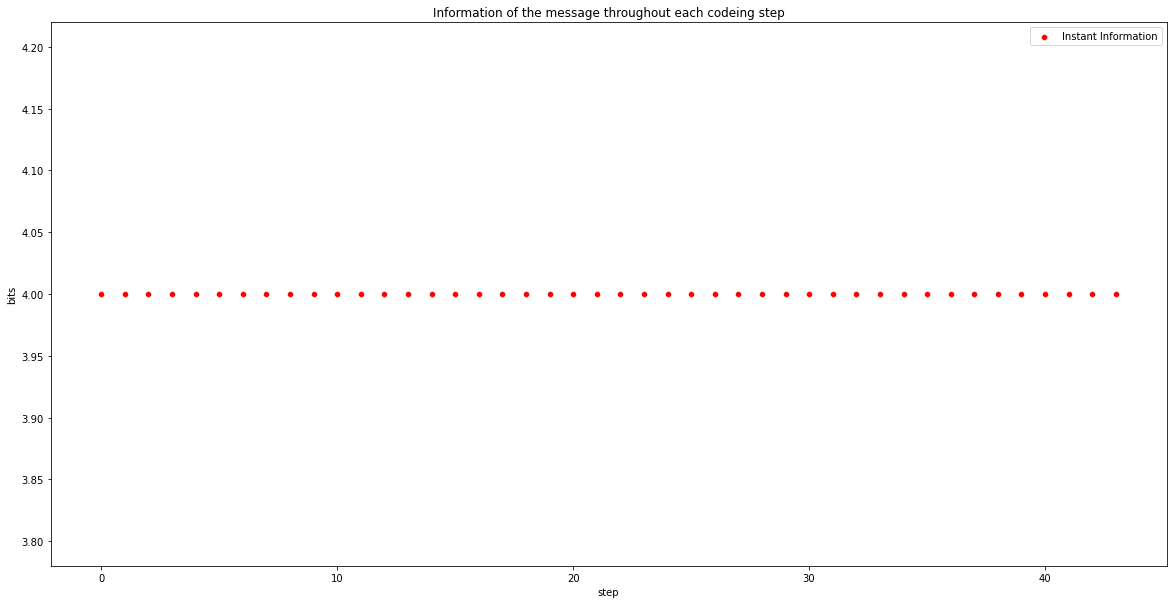

In [15]:
plt.figure(figsize=(20,10))
plt.title('Information of the message throughout each codeing step')
#sns.scatterplot(x=range(len(y)), y=y, color='blue')
p = sns.scatterplot(x=range(len(arr)), y=arr, color='red')
plt.xlabel('step')
plt.ylabel('bits')
plt.legend(labels=['Instant Information'])

In [74]:

plt.figure(figsize=(20,10))
sns.scatterplot(x=range(len(y2[:1000])), y=y2[:1000], color='blue')
sns.scatterplot(x=range(len(y1[:1000])), y=y1[:1000], color='red')

<AxesSubplot:>

<AxesSubplot:>

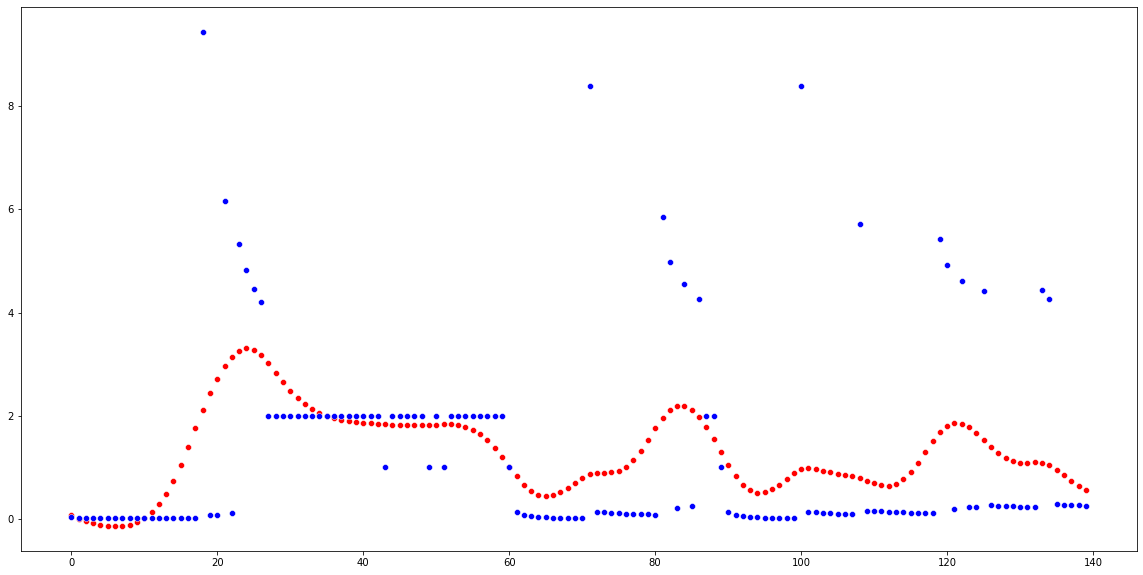

In [27]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=range(len(y[6_660:6_800])), y=y[6_660:6_800], color='red')
sns.scatterplot(x=range(len(arr[6_660:6_800])), y=arr[6_660:6_800], color='blue')

<AxesSubplot:>

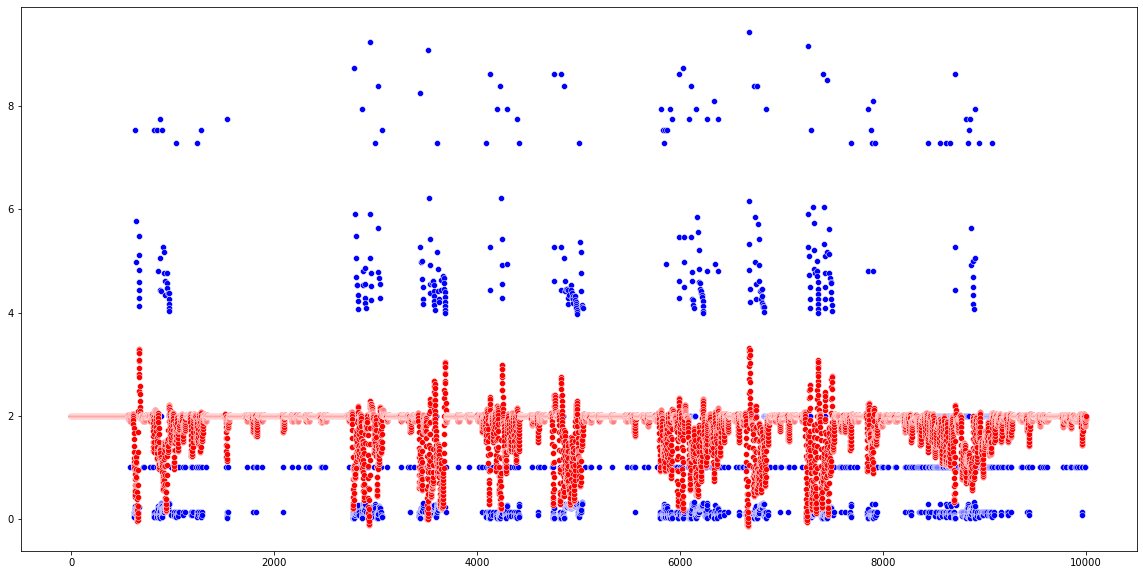

In [4]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=range(len(arr[:10_000])), y=arr[:10_000], color='blue')
sns.scatterplot(x=range(len(y[:10_000])), y=y[:10_000], color='red')
#sns.scatterplot(x=range(len(arr[:10_000])), y=arr[:10_000], color='blue')

In [54]:
arr[6_660:6_800]

array([2.80144e-02, 2.34590e-02, 2.01779e-02, 1.77020e-02, 1.57673e-02,
       1.42139e-02, 1.29391e-02, 1.18741e-02, 1.09711e-02, 1.01958e-02,
       9.52277e-03, 8.93312e-03, 8.41224e-03, 7.94875e-03, 7.53367e-03,
       7.15979e-03, 6.82127e-03, 6.51331e-03, 9.44294e+00, 6.71142e-02,
       6.43906e-02, 6.15895e+00, 1.15919e-01, 5.33220e+00, 4.82059e+00,
       4.46582e+00, 4.19794e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00,
       2.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       1.00000e+00, 1.25531e-01, 6.71142e-02, 4.58037e-02, 3.47654e-02,
       2.80144e-02, 2.34590e-02, 2.01779e-02, 1.77020e-02, 1.576